<a href="https://colab.research.google.com/github/bobi404/Scientific-Computing-LAB/blob/main/SC_Sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solusi Gauss-Seidel 1: [-8.85379963e+93 -2.65613989e+94  7.96841967e+94]
Solusi Numpy 1: [0.65 4.15 3.75]
Solusi Gauss-Seidel 2: [ 3.00001426 -2.49999286  6.99999971]
Solusi Numpy 2: [ 3.  -2.5  7. ]
Persamaan regresi: y = 2.0000x + 0.0000


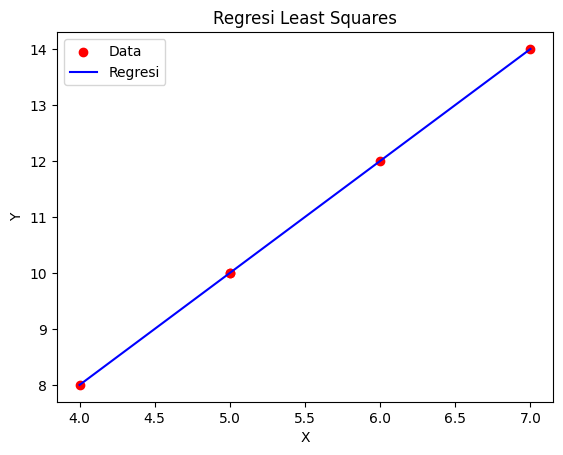

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, B, x_init, tol=0.001, max_iter=100):
    x = np.array(x_init, dtype=float)
    n = len(B)

    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (B[i] - sum1) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new

    return x

# Persamaan pertama
A1 = np.array([[2, 3, -1], [1, -1, 2], [3, 2, 1]], dtype=float)
B1 = np.array([10, 4, 14], dtype=float)

x_init1 = [5, 5, 5]
x_sol1 = gauss_seidel(A1, B1, x_init1)
numpy_sol1 = np.linalg.solve(A1, B1)

print("Solusi Gauss-Seidel 1:", x_sol1)
print("Solusi Numpy 1:", numpy_sol1)

# Persamaan kedua
A2 = np.array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]], dtype=float)
B2 = np.array([7.85, -19.3, 71.4], dtype=float)

x_init2 = [1, 2, 3]
x_sol2 = gauss_seidel(A2, B2, x_init2)
numpy_sol2 = np.linalg.solve(A2, B2)

print("Solusi Gauss-Seidel 2:", x_sol2)
print("Solusi Numpy 2:", numpy_sol2)

# Least Squares Regression
def least_squares(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    a = sum((X - X_mean) * (Y - Y_mean)) / sum((X - X_mean) ** 2)
    b = Y_mean - a * X_mean

    return a, b

X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])
a, b = least_squares(X, Y)

print(f"Persamaan regresi: y = {a:.4f}x + {b:.4f}")

# Plot hasil regresi
plt.scatter(X, Y, color='red', label='Data')

x_line = np.linspace(min(X), max(X), 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, color='blue', label='Regresi')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Regresi Least Squares")
plt.show()
